In [ ]:
# Import necessary libraries
!pip install transformers
!pip install datasets


from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023",'raw_review_Appliances')

print(dataset)

# Convert the 'full' dataset to a pandas DataFrame
review_df = dataset['full'].to_pandas()


"""# Save the DataFrame to a CSV file
review_df.to_csv('/Users/apple/Desktop/Business Project/review.csv', index=False)"""

from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023",'raw_meta_Appliances')

print(dataset)

# Convert the 'full' dataset to a pandas DataFrame
product_df = dataset['full'].to_pandas()

"""# Save the DataFrame to a CSV file
product_df.to_csv('/Users/apple/Desktop/Business Project/dataset.csv', index=False)"""



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating full split: 0 examples [00:00, ? examples/s]

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 2128605
    })
})


Generating full split: 0 examples [00:00, ? examples/s]

DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 94327
    })
})


"# Save the DataFrame to a CSV file\nproduct_df.to_csv('/Users/apple/Desktop/Business Project/dataset.csv', index=False)"

In [ ]:
# Filter DataFrame for 'Appliances' in 'main_category'
import pandas as pd
filtered_df = product_df[product_df['main_category'] == 'Appliances']
selected_product_columns = ['main_category', 'title', 'average_rating', 'rating_number', 'store', 'parent_asin']
filtered_product_df = filtered_df[selected_product_columns]

selected_review_columns = ['rating', 'title', 'text', 'parent_asin', 'timestamp', 'verified_purchase']
filtered_review_df = review_df[selected_review_columns]

print("Shape before filtering:", filtered_product_df.shape)
print("Shape before filtering:", filtered_review_df.shape)


# Merge the DataFrames on 'parent_asin'
merged_df = filtered_review_df.merge(filtered_product_df, on='parent_asin', how='inner')


# Select 2013-2023 range
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='ms')
start_date = '2013-01-01'
end_date = '2023-12-31'
filtered_df = merged_df[(merged_df['timestamp'] >= start_date) & (merged_df['timestamp'] <= end_date)]

verified_review = filtered_df[filtered_df['verified_purchase'] == True]
# Output the shape of the DataFrame after filtering
print("Shape after filtering:", verified_review.shape)

print(verified_review)

Shape before filtering: (25572, 6)
Shape before filtering: (2128605, 6)
Shape after filtering: (548426, 11)
        rating                                            title_x  \
0          5.0                                         Five Stars   
1          5.0  My old door hinge broke. This worked perfectly...   
2          5.0       Perfect fit and repair for our LG dryer door   
3          5.0                         Perfect match for DLE0442W   
4          5.0                                          Fit fine.   
...        ...                                                ...   
588771     3.0                                   Misleading photo   
588772     1.0                                       Doesn't work   
588774     1.0                                 Item was defective   
588776     5.0                          Fits properly, thank you!   
588777     5.0                                         Five Stars   

                                                     text paren

In [ ]:
!pip install pandas scikit-learn nltk
!pip install scikit-learn sentence_transformers pandas numpy


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/17139 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

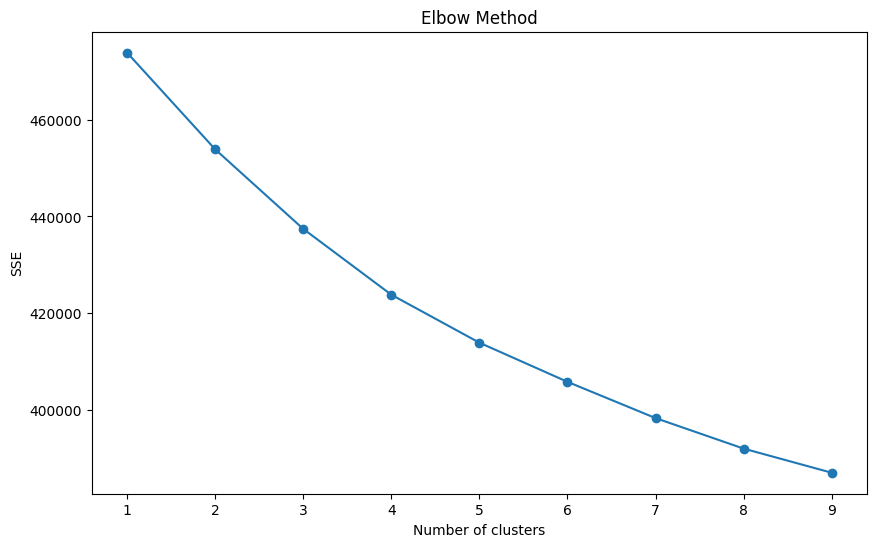

In [ ]:

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

review_data = verified_review['text']
model = SentenceTransformer('all-MiniLM-L6-v2')  # 加载预训练的SBERT模型
embeddings = model.encode(review_data.tolist(), show_progress_bar=True)


# 计算不同k值的SSE（误差平方和）
sse = []
for k in range(1, 10):  # 检查1到10个簇
    kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
    sse.append(kmeans.inertia_)

# 绘制Elbow图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()



In [ ]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
# 输出聚类的结果
labels = kmeans.labels_
print("Cluster assignments:", labels)

cluster_data = []

for i in range(k):
    cluster_documents = review_data[labels == i]
    for doc in cluster_documents:
        cluster_data.append({'Category': f"Cluster {i+1}", 'Sentence': doc})

# DataFrame
cluster_df = pd.DataFrame(cluster_data)

print(cluster_df.head())





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster assignments: [1 5 5 ... 5 1 4]
    Category                                           Sentence
0  Cluster 1  Ordered Wednesday, received Friday (shipped fr...
1  Cluster 1   took 20 minutes to install and fixed my problem.
2  Cluster 1  Easy to install and fit exactly as the part it...
3  Cluster 1                 Look and install like the original
4  Cluster 1  Worked great, easy to install, and I think it’...


In [ ]:
# Save
cluster_df.to_csv('cluster_df.csv', index=False)

NameError: name 'cluster_df' is not defined

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download

cluster_df=pd.read_csv('/Users/apple/Desktop/Business Project/data/cluster_df.csv')
def preprocess_sentence(sentence):
    # Ensure the input is a string
    sentence = str(sentence)

    # Convert the sentence to lowercase
    sentence = sentence.lower()

    # Remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Remove non-alphanumeric characters
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Define stop words
    stop_words = set(stopwords.words('english'))

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Add additional stop words
    additional_words = {'el', 'ge','la', 'de', 'br','mi','na','que','one','se','lo','en'}
    stop_words.update(additional_words)

    # Remove stop words and perform lemmatization
    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence.split() if word not in stop_words])

    # Remove extra whitespace
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence



cluster_df['Progress Sentence'] = cluster_df['Sentence'].apply(preprocess_sentence)






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
"""from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
import re

review_data = cluster_df['Progress Sentence']
labels = cluster_df['Category'].apply(lambda x: int(re.search(r'\d+', x).group()) - 1)

k = 7
# 划分数据至各个聚类
clustered_sentences = [[] for i in range(k)]
for sentence, cluster_id in zip(review_data, labels):
    clustered_sentences[cluster_id].append(sentence)

# 字典用来储存所有聚类的主题数据
cluster_topics_dict = {}
# 逐个聚类应用TF-IDF和LDA
for i, sentences in enumerate(clustered_sentences):
    print(f"\nCluster {i+1}:")
    vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, stop_words='english')
    X = vectorizer.fit_transform(sentences)

    lda = LatentDirichletAllocation(n_components=7, max_iter=20, random_state=42)
    lda.fit(X)

    # 展示每个聚类的主题关键词
    def display_topics(model, feature_names, no_top_words):
        topics = {}
        for topic_idx, topic in enumerate(model.components_):
            top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            topics[f"Topic {topic_idx}"] = ", ".join(top_features)
        return topics

    topic_keywords = display_topics(lda, vectorizer.get_feature_names_out(), 15)
    print("Top words per topic:", topic_keywords)

    # 将聚类编号和其主题关键词添加到字典
    cluster_topics_dict[f"Cluster {i+1}"] = topic_keywords

# 输出存储有主题关键词的字典
print(cluster_topics_dict)
"""

NameError: name 'cluster_df' is not defined

In [ ]:
!pip install -U sentence-transformers
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")


characteristics = {
    "described": ["described"],
    "price": ["price", "saved", "money", "cheaper", "cost", "value", "purchase", "expensive", "worth"],
    "install": ["install", "loud"],
    "delivery": ["fast", "delivery", "shipping", "arrived", "quick", "time"],
    "design": ["look"],
    "fit": ["size", "fit", "small"],
    "product": ["original", "replacement", "plastic", "light", "noise", "metal"],
    "work": ["work", "worked", "use"],
    "fix": ["replacement"],
    "service": ["customer", "service", "company", "return", "review", "warranty"],
    "durability": ["quality", "broke"],
    "brand": ["brand"],
    "emotion": ["great", "perfectly", "good", "love", "nice", "happy", "best", "excellent", "like"]
}

# Create a list of all characteristic phrases
all_phrases = [phrase for phrases in characteristics.values() for phrase in phrases]


# Compute embeddings for document sentences and characteristic phrases
document_sentences = verified_review['text'].tolist()
document_embeddings = model.encode(document_sentences)
phrase_embeddings = model.encode(all_phrases)

# Compute cosine similarities
similarities = util.pytorch_cos_sim(document_embeddings, phrase_embeddings).numpy()

# Output the pairs with their score
for idx_i, sentence in enumerate(document_sentences):
    print(f"Document Sentence: '{sentence}'")
    for characteristic, phrases in characteristics.items():
        # Get the indices of the phrases corresponding to the current characteristic
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        # Get the maximum similarity score for the current characteristic
        max_similarity = max(similarities[idx_i][phrase_indices])
        print(f" - Characteristic '{characteristic}': {max_similarity:.4f}")
    print()


流式输出内容被截断，只能显示最后 5000 行内容。
 - Characteristic 'service': 0.1949
 - Characteristic 'durability': 0.2117
 - Characteristic 'brand': 0.0510
 - Characteristic 'emotion': 0.0972

Document Sentence: 'Fit just right and very easy to put on'
 - Characteristic 'described': 0.2126
 - Characteristic 'price': 0.1516
 - Characteristic 'install': 0.3202
 - Characteristic 'delivery': 0.1754
 - Characteristic 'design': 0.1686
 - Characteristic 'fit': 0.5125
 - Characteristic 'product': 0.1550
 - Characteristic 'work': 0.1755
 - Characteristic 'fix': 0.0531
 - Characteristic 'service': 0.1176
 - Characteristic 'durability': 0.2452
 - Characteristic 'brand': 0.2288
 - Characteristic 'emotion': 0.2622

Document Sentence: 'Esta bonito por fuera ,pero no enfria lo suficiente !!'
 - Characteristic 'described': 0.0786
 - Characteristic 'price': 0.0961
 - Characteristic 'install': 0.0959
 - Characteristic 'delivery': 0.1245
 - Characteristic 'design': 0.0864
 - Characteristic 'fit': 0.1340
 - Characteristic 'p

In [ ]:
from transformers import pipeline
import torch
from transformers import pipeline, BertTokenizer

# Ensure you are running on GPU if available
device = 0 if torch.cuda.is_available() else -1

# Initialize sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:

# Define similarity threshold
similarity_threshold = 0.2

# Collect results in a list
results = []

# Output the pairs with their score and sentiment
for idx, sentence in enumerate(document_sentences):
    print(f"Document Sentence: {sentence}")
    max_similarity = 0
    best_characteristic = None

    for characteristic, phrases in characteristics.items():
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        current_max_similarity = max(similarities[idx, phrase_indices])

        if current_max_similarity > max_similarity:
            max_similarity = current_max_similarity
            best_characteristic = characteristic

    if max_similarity > similarity_threshold:
        # Tokenize the sentence to check its length
        tokens = tokenizer.encode(sentence, truncation=True,max_length=500)
        truncated_sentence = tokenizer.decode(tokens)
        # Get the sentiment
        sentiment = sentiment_pipeline(truncated_sentence)
        sentiment_label = sentiment[0]['label']
        sentiment_score = sentiment[0]['score']

        # Determine the polarity of the sentiment
        if sentiment_label in ['1 star', '2 stars']:
            sentiment_polarity = 'negative'
        elif sentiment_label in ['4 stars', '5 stars']:
            sentiment_polarity = 'positive'
        else:
            sentiment_polarity = 'neutral'

    # Append the results to the list
    results.append({
        'Sentence': sentence,
        'Characteristic': best_characteristic,
        'Characteristic Score': max_similarity,
        'Sentiment Polarity': sentiment_polarity,
        'Stars': sentiment_label,
        'Sentiment Score': sentiment_score
    })

# Convert the results list to a DataFrame
final_data = pd.DataFrame(results)

#print(f" - Characteristic '{best_characteristic}': {max_similarity:.4f}, sentiment polarity: {sentiment_polarity} ({sentiment_label} {sentiment_score:.4f})")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


流式输出内容被截断，只能显示最后 5000 行内容。
Document Sentence: second one in less then a year, hope this one lasts
Document Sentence: I replaced my original circuit board because one of the buttons used often (&#34;button to switch between cubes, crushed ice, and water) became worn and constantly actuated. The replacement item works as designed - it is the same revision as the original. The problem is that it does not fix the original issue of a poorly designed button. Over time the same issue will happen again.
Document Sentence: I'd ordered these before for my LG refrigerator and must say I'm very happy with them. They do what they're supposed to do and last a long time.
Document Sentence: Purchasing it in a bundle is worth it . Keeps me from constantly buying a pack and saves money .
Document Sentence: Easy to install.
Document Sentence: Arrived prompt and easy to install craftsmanship
Document Sentence: Easy to install, work just fine!
Document Sentence: problem solved
Document Sentence: Did not in

In [ ]:
verified_review = verified_review.reset_index(drop=True)
final_data = final_data.reset_index(drop=True)
df_all_m2 = pd.concat([verified_review, final_data], axis=1)

In [ ]:
df_all_m2.to_csv('df_all_m2.csv', index=False)

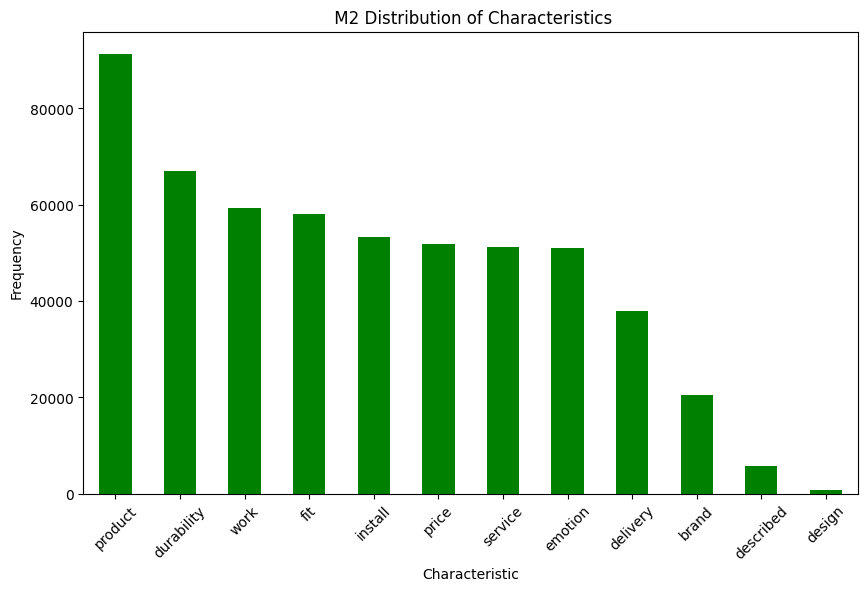

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df_all =pd.read_csv('df_all_m2.csv')
# Plot 1: Distribution of Characteristics
plt.figure(figsize=(10, 6))
df_all['Characteristic'].value_counts().plot(kind='bar',color='green')
plt.title(' M2 Distribution of Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

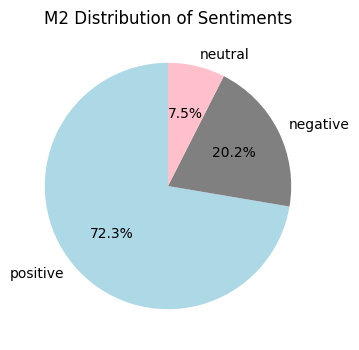

In [ ]:
# Load data

# Create a pie chart for the sentiment polarity distribution with specific colors
colors = ['lightblue', 'gray', 'pink']
plt.figure(figsize=(6, 4))
df_all['Sentiment Polarity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('M2 Distribution of Sentiments')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

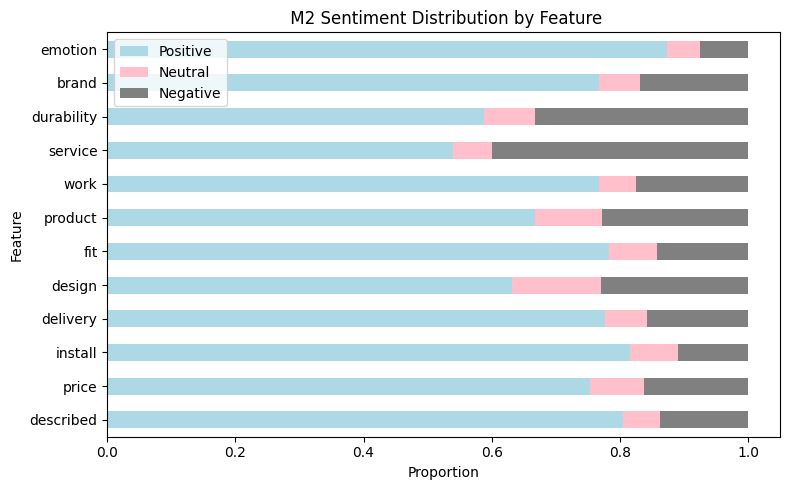

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Map sentiment to labels for visualization
df_all['label'] = df_all['Sentiment Polarity'].map({'positive': 0, 'neutral': 1, 'negative': 2})

# Feature list
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'service',
    'durability',
    'brand',
    'emotion'
]

# Prepare figure layout
fig, ax = plt.subplots(figsize=(8, 5))

# Initialize an empty DataFrame to store sentiment data for each feature
sentiment_data = pd.DataFrame()

for feature in features:
    subset = df_all_m2[df_all['Characteristic'] == feature]
    sentiment_distribution = subset['Sentiment Polarity'].value_counts(normalize=True)
    sentiment_distribution = sentiment_distribution.reindex(['positive', 'neutral', 'negative'], fill_value=0)
    sentiment_data = pd.concat([sentiment_data, sentiment_distribution.to_frame().T])

# Set the feature names as the index
sentiment_data.index = features

# Plotting
sentiment_data.plot(kind='barh', stacked=True, ax=ax, color=['lightblue','pink','gray']  )
ax.set_xlabel('Proportion')
ax.set_ylabel('Feature')
ax.set_title(' M2 Sentiment Distribution by Feature')
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.show()

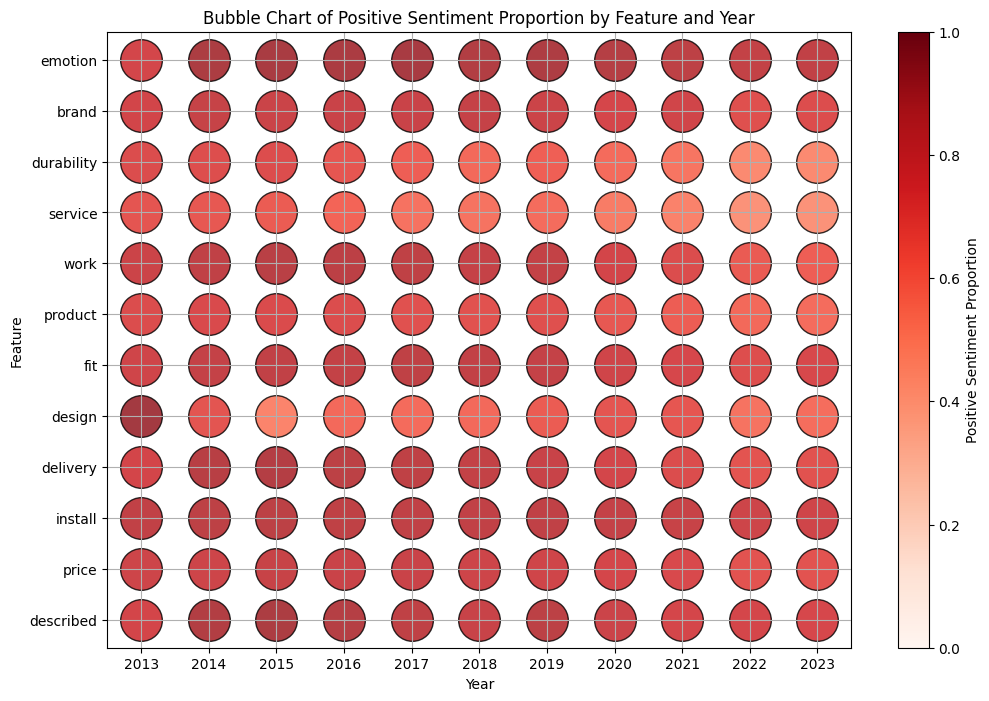

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming the data is loaded into df_all


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Ensure timestamp column is datetime type, and extract year
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all['year'] = df_all['timestamp'].dt.year

# Map sentiment to a binary label for calculating proportions (1 for positive, 0 otherwise)
df_all['label'] = df_all['Sentiment Polarity'].apply(lambda x: 1 if x == 'positive' else 0)

# Feature list
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'service',
    'durability',
    'brand',
    'emotion'
]

# Calculate the proportion of positive sentiment per feature per year
bab_data = pd.DataFrame(index=features, columns=np.sort(df_all['year'].unique()))

# Fill bab_data DataFrame
for year in bab_data.columns:
    for feature in bab_data.index:
        if df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].count() > 0:
            bab_data.loc[feature, year] = df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].mean()
        else:
            bab_data.loc[feature, year] = 0

# Create a color map for visualization
cmap = plt.cm.Reds  # You can change the color map to any you prefer

# Normalize the color map based on the proportion values
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a bubble chart
fig, ax = plt.subplots(figsize=(12, 8))
for feature in bab_data.index:
    for year in bab_data.columns:
        proportion = bab_data.loc[feature, year]
        color = cmap(norm(proportion))
        ax.scatter(year, feature, color=color, s=900, alpha=0.8, edgecolors='black')  # Fixed size

ax.set_xlabel('Year')
ax.set_ylabel('Feature')
ax.set_title('Bubble Chart of Positive Sentiment Proportion by Feature and Year')
ax.grid(True)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', label='Positive Sentiment Proportion')
plt.xticks(bab_data.columns)
plt.show()

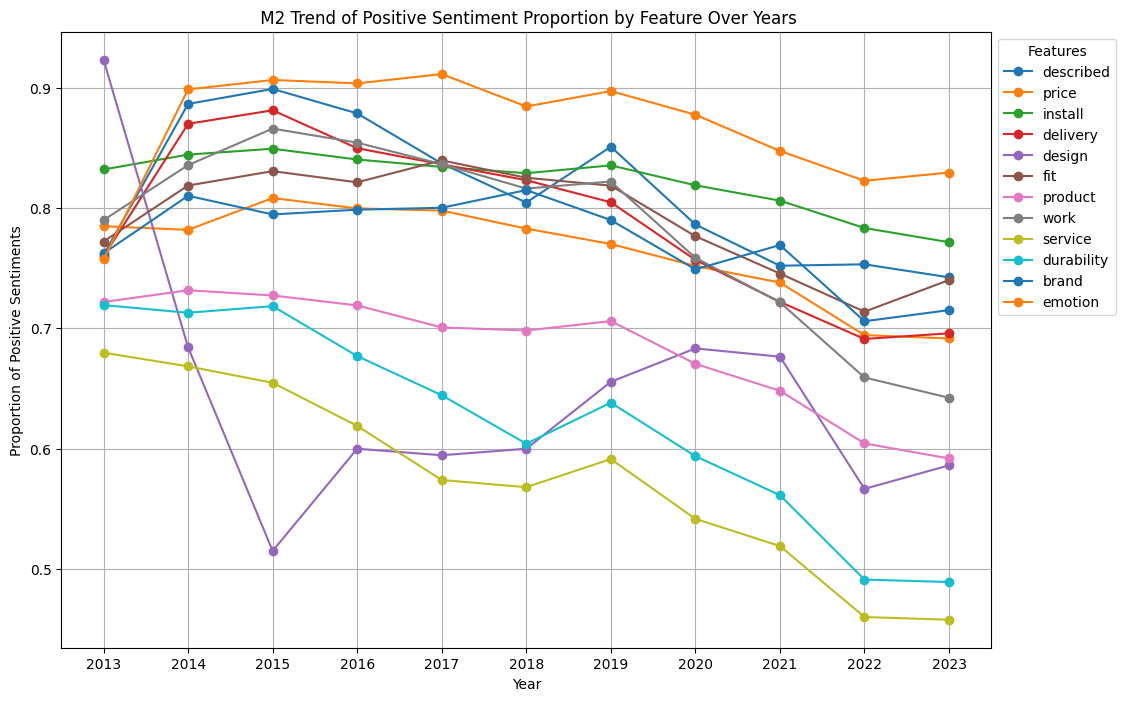

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for feature in bab_data.index:
    ax.plot(bab_data.columns, bab_data.loc[feature], marker='o', label=feature)

ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Positive Sentiments')
ax.set_title(' M2 Trend of Positive Sentiment Proportion by Feature Over Years')
ax.grid(True)
# Place the legend outside the plot area on the right side
ax.legend(title='Features', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(bab_data.columns)  # Ensure x-axis has the correct year labels
plt.show()

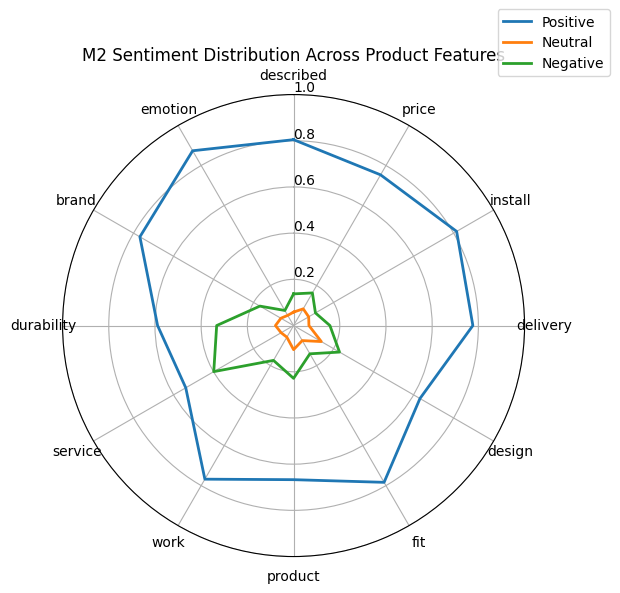

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi



# 清理数据
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# 特征列表
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'service',
    'durability',
    'brand',
    'emotion'
]

# 计算每个特征的情感分布
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]  # 将起点闭合

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 绘制三种情感的线
for sentiment in ['positive', 'neutral', 'negative']:
    values = []
    for feature in features:
        subset = df_all[df_all['Characteristic'] == feature]
        sentiment_count = subset['Sentiment Polarity'].value_counts(normalize=True).get(sentiment, 0)
        values.append(sentiment_count)
    values += values[:1]
    ax.plot(angles, values, label=sentiment.capitalize(), linewidth=2)

# 设置图表
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels=features)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)
plt.title('M2 Sentiment Distribution Across Product Features')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

df_all.csv  M1.ipynb  M2.ipynb  Untitled0.ipynb
